<a href="https://colab.research.google.com/github/samapatil1729/Projects/blob/main/food_102_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import basic libraries
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
#Loading data 
# will return a tf.data.Dataset that yields batches of images from the subdirectories 
# ice_cream, pizza and samosa, , together with labels 0, 1 and 2


data = tf.keras.utils.image_dataset_from_directory('food-102')

Found 3000 files belonging to 3 classes.


In [ ]:
#data visualisation

data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

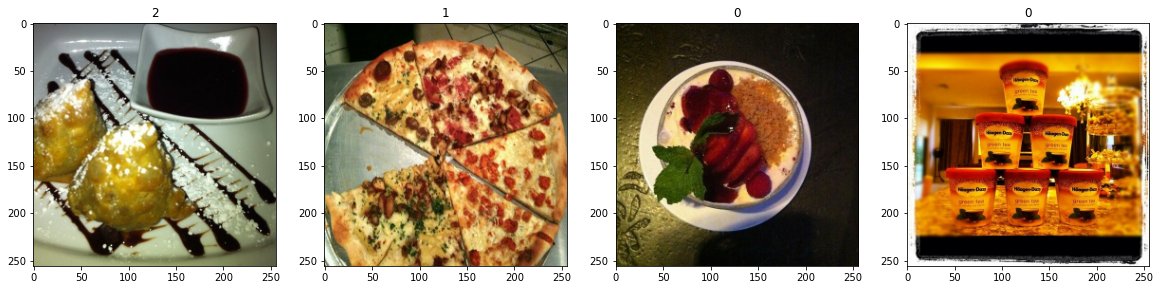

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# class 0 -ice-cream
# class 1 - pizza
# class 2 - samosa

In [ ]:
#Scaling the data

data = data.map(lambda x,y: (x/255, y))

In [ ]:
len(data)

94

In [ ]:
#Spliting the data in training and test set

train_size = int(len(data)*.60)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#Deep learning model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

In [ ]:
#Setting up lyers

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
56/56 [==============================] - 69s 1s/step - loss: 1.0966 - accuracy: 0.4738 - val_loss: 1.0010 - val_accuracy: 0.4792
Epoch 2/20
56/56 [==============================] - 66s 1s/step - loss: 0.8206 - accuracy: 0.6440 - val_loss: 0.7309 - val_accuracy: 0.7049
Epoch 3/20
56/56 [==============================] - 69s 1s/step - loss: 0.6812 - accuracy: 0.7188 - val_loss: 0.6479 - val_accuracy: 0.7483
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 0.5707 - accuracy: 0.7656 - val_loss: 0.6751 - val_accuracy: 0.7378
Epoch 5/20
56/56 [==============================] - 75s 1s/step - loss: 0.4784 - accuracy: 0.8086 - val_loss: 0.5764 - val_accuracy: 0.7517
Epoch 6/20
56/56 [==============================] - 73s 1s/step - loss: 0.3758 - accuracy: 0.8605 - val_loss: 0.7420 - val_accuracy: 0.7205
Epoch 7/20
56/56 [==============================] - 71s 1s/step - loss: 0.3394 - accuracy: 0.8783 - val_loss: 0.5972 - val_accuracy: 0.7951
Epoch 8/20
56/56 [==

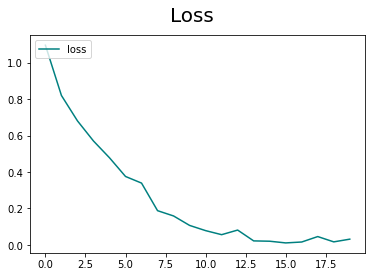

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
#plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

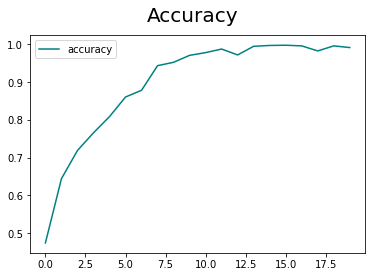

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
#plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
import cv2

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat = [np.argmax(arr) for arr in yhat]
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 1s 547ms/step


In [ ]:
print(f'Prcision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Prcision:0.8410404920578003, Recall:0.767810046672821, Accuracy:0.6840277910232544


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,yhat))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.50      0.88      0.64         8
           2       0.80      0.40      0.53        10

    accuracy                           0.66        32
   macro avg       0.69      0.66      0.64        32
weighted avg       0.71      0.66      0.65        32

